In [1]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.91 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.5/107.7 GB disk)


In [2]:
!wget https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/personas_cine.jpg
!wget https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/pose3.jpg
!wget https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/minicky_pose.jpg
!wget https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/personas_independencia.jpg

--2024-09-09 23:50:44--  https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/personas_cine.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3198796 (3.0M) [image/jpeg]
Saving to: ‘personas_cine.jpg’

personas_cine.jpg   100%[===================>]   3.05M  --.-KB/s    in 0.08s   

2024-09-09 23:50:44 (39.2 MB/s) - ‘personas_cine.jpg’ saved [3198796/3198796]

--2024-09-09 23:50:44--  https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/pose3.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, aw

In [3]:
from ultralytics import YOLO
import os

model = YOLO("yolov8n-seg.pt")

results = model("minicky_pose.jpg")

save_dir = "/content/YOLO-Pre-Trained-Results"
os.makedirs(save_dir, exist_ok=True)

results = results[0]

file_path = os.path.join(save_dir, "minicky_pose.jpg")
results.save(file_path)

# Verificar si la imagen ha sido guardado o no
if os.path.exists(file_path):
    print(f"La imagen se ha guardado en: {file_path}")
else:
    print("No se ha podido guardar la imagen.")

100%|██████████| 6.74M/6.74M [00:00<00:00, 72.5MB/s]



image 1/1 /content/minicky_pose.jpg: 480x640 1 cat, 1 couch, 1341.1ms
Speed: 20.1ms preprocess, 1341.1ms inference, 74.5ms postprocess per image at shape (1, 3, 480, 640)
La imagen se ha guardado en: /content/YOLO-Pre-Trained-Results/minicky_pose.jpg


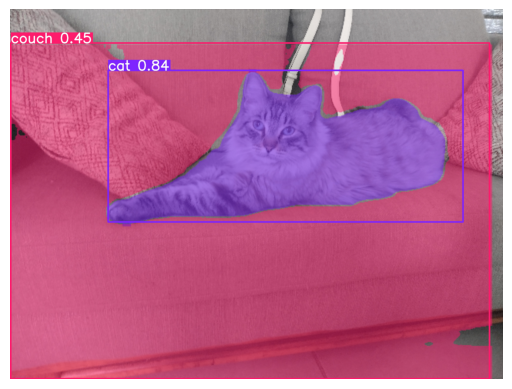

In [4]:
import matplotlib.pyplot as plt
import cv2

resultado_segmentacion = "/content/YOLO-Pre-Trained-Results/minicky_pose.jpg"
img = cv2.imread(resultado_segmentacion)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

In [5]:
from ultralytics import YOLO
import os

modelo = YOLO("yolov8n-seg.pt")

imagenes = ["pose3.jpg","personas_cine.jpg", "personas_independencia.jpg"]

save_dir = "/content/YOLO-Pre-Trained-Results"
os.makedirs(save_dir, exist_ok=True)

for img_path in imagenes:
  results=modelo(img_path)
  result = results[0]
  output_image_name = f"Resultado_{os.path.basename(img_path)}"
  output_image_path = os.path.join(save_dir, output_image_name)
  result.save(output_image_path)


  if os.path.exists(file_path):
      print(f"Imagen guardada correctamente en {file_path}")
  else:
      print("No se pudo guardar la imagen.")


image 1/1 /content/pose3.jpg: 640x512 1 person, 893.8ms
Speed: 22.5ms preprocess, 893.8ms inference, 6.8ms postprocess per image at shape (1, 3, 640, 512)
Imagen guardada correctamente en /content/YOLO-Pre-Trained-Results/minicky_pose.jpg

image 1/1 /content/personas_cine.jpg: 480x640 11 persons, 1 handbag, 1112.6ms
Speed: 13.5ms preprocess, 1112.6ms inference, 177.5ms postprocess per image at shape (1, 3, 480, 640)
Imagen guardada correctamente en /content/YOLO-Pre-Trained-Results/minicky_pose.jpg

image 1/1 /content/personas_independencia.jpg: 480x640 16 persons, 2 umbrellas, 1154.3ms
Speed: 13.1ms preprocess, 1154.3ms inference, 248.9ms postprocess per image at shape (1, 3, 480, 640)
Imagen guardada correctamente en /content/YOLO-Pre-Trained-Results/minicky_pose.jpg


(-0.5, 3999.5, 2999.5, -0.5)

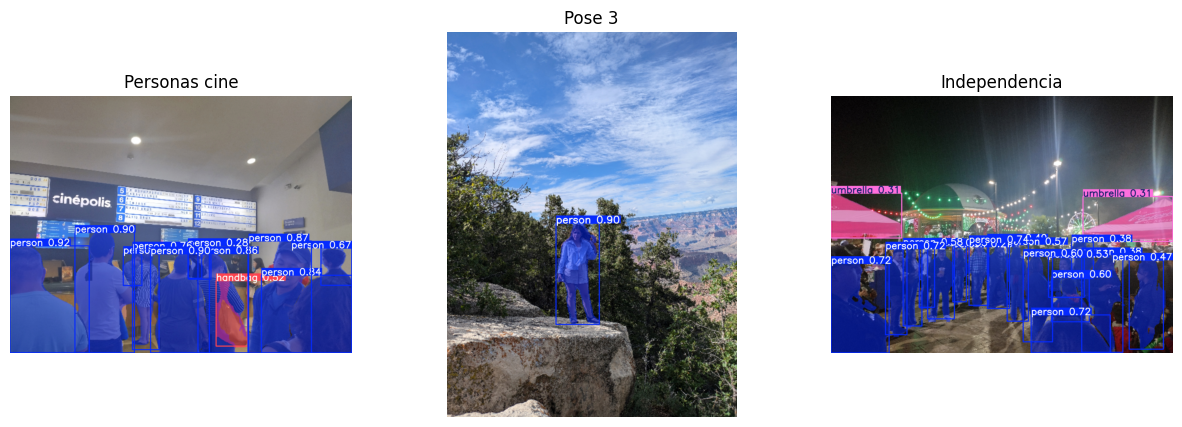

In [6]:
import matplotlib.pyplot as plt
import cv2

seg_1 = "/content/YOLO-Pre-Trained-Results/Resultado_personas_cine.jpg"
seg_2 = "/content/YOLO-Pre-Trained-Results/Resultado_pose3.jpg"
seg_3 = "/content/YOLO-Pre-Trained-Results/Resultado_personas_independencia.jpg"

img_1 = cv2.imread(seg_1)
img_2 = cv2.imread(seg_2)
img_3 = cv2.imread(seg_3)

img_1_color = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
img_2_color = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
img_3_color = cv2.cvtColor(img_3, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img_1_color)
axes[0].set_title("Personas cine")
axes[0].axis("off")

axes[1].imshow(img_2_color)
axes[1].set_title("Pose 3")
axes[1].axis("off")

axes[2].imshow(img_3_color)
axes[2].set_title("Independencia")
axes[2].axis("off")

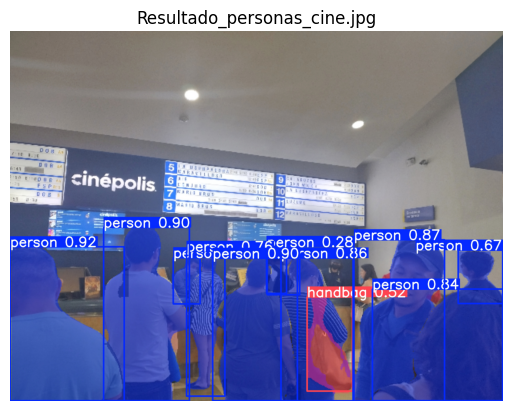

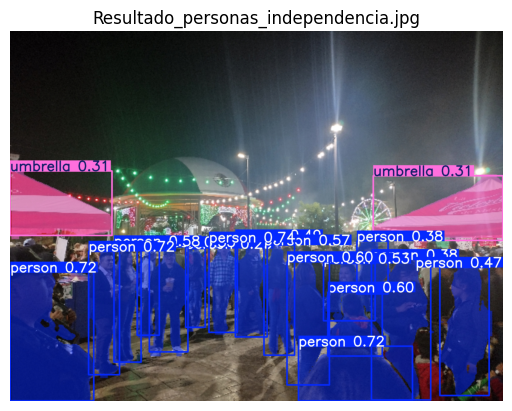

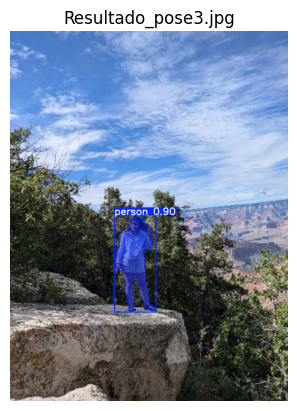

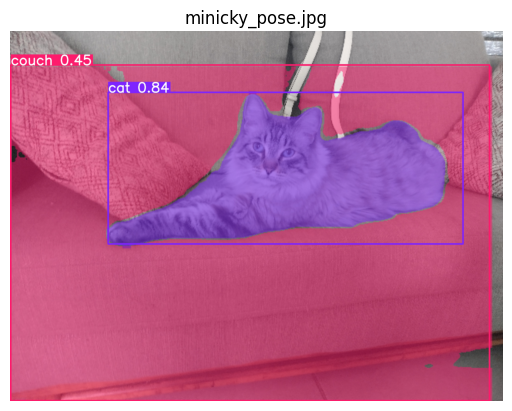

In [8]:
import matplotlib.pyplot as plt
import cv2
import os

segmentaciones = ["/content/YOLO-Pre-Trained-Results/Resultado_personas_cine.jpg",
                  "/content/YOLO-Pre-Trained-Results/Resultado_personas_independencia.jpg",
                  "/content/YOLO-Pre-Trained-Results/Resultado_pose3.jpg",
                  "/content/YOLO-Pre-Trained-Results/minicky_pose.jpg"]

for img_path in segmentaciones:
  img = cv2.imread(img_path)
  img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img_color)
  plt.title(os.path.basename(img_path))
  plt.axis("off")
  plt.show()